ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. As the lead data scientist at ACME, you're tasked with creating an automated system to estimate the annual medical expenditure for new customers, using information such as their age, sex, BMI, children, smoking habits and region of residence.

Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer. Due to regulatory requirements, you must be able to explain why your system outputs a certain prediction.

In [ ]:
from urllib.request import urlretrieve

In [ ]:
url = "https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv"

In [ ]:
urlretrieve(url,"medical.csv")

('medical.csv', <http.client.HTTPMessage at 0x7f22f793ed10>)

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("medical.csv")

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


The dataset contains 1338 rows and 7 Columns where each row of the dataset contains information about one customer

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


* Age:
  The minimum age of the customer is 18, The maximum age is 64.
* BMI: minimum bmi is 15.9 and the max is 53.13
* Children: min of 0 to max of 5
* Charges : min of 1121 and max of 63770


In [ ]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [ ]:
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

EDA
* Age: Age is the integer column so we can visulalize using Histogram.
total there are 1338 row the min age is 18 and max age is 65. so they are 47 unique ages.

In [ ]:
age = px.histogram(df,
                   x="age",
                   marginal='box',
                   nbins=47,
                   title="Distribution of Age")
age.update_layout(bargap=0.1)
age.show()

age is column is distributed uniformly but the age 18 and 19 has more values as compared to other ages. for every age there are 20 - 40 customers

BMI : Body Mass Index
* BMI is a derived metric which is used to find wheather the person is obese or normal. it is also a numerical column so we can use histogram to view the distribution.

In [ ]:
bmi = px.histogram(df,
                   x="bmi",
                   marginal='box',
                   color_discrete_sequence=["red"],
                   title="Distribution of Histogram")
bmi.update_layout(bargap=0.1)
bmi.show()

from the above chart we clearly see that the bmi is distributed normally with few outliers. 68 % of customers are in the range of 25 to 35 bmi which is slightly overweight.

Charges is our label for model lets explore how charges behave.

In [ ]:
cld = px.histogram(df,
                   x="charges",
                   marginal="box",
                   title="Distribution of Charges")
cld.update_layout(bargap=0.1)
cld.show()

Distribution of charges is quiet different from others column, here most of the values are below 15K and has more outliers. the median charges are 9K but the max charge is 63. we have to find why this charges varies a lot.

Children: 
* This column tells how many childern the person who took insurance have.

In [ ]:
fig = px.histogram(df,
                   x="children",
                   title="Count of Children")
fig.update_layout(bargap=0.1)
fig.show()

most customer who took the insurance has 0 children, this seems that customers who took the insurance are most likely not married

Smoker or Not: This column is a category values whether the customer smoke or not 

In [ ]:
df["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
fig= px.histogram(df,
                  x="smoker",
                  title="Count of Smoker or Not")
fig.show()

only 20% of the dataset has the smoker and rest is non smokers 

Region 

In [ ]:
px.histogram(df,
             x="region",
             title="Distribution of Region")

every region has equal customers, southeast has 40 more customer than other 4 regions

Bivariate Analysis:
* here we use two column to get insight from the data.
* Age vs Charges
  * both are numerical values so we can visulalize using scatter plot

In [ ]:
px.scatter(df,
           x="age",
           y="charges",
           title="Age vs Charges")

this chart shows
* that age increases then the price also increases but they are three cluster let figure out
* the min charges for  custmer  who smokes is 12K and max is 63K
* the min charges for customer who dont smoke is 1.2K and max is 36 K
  * this shows that when the customer smoke the charges increases significantly.
* First Cluster show the customer who doesn't smoke and they has low charges.
* Second cluster show the mix of customers who smoke and dont smoke have charges more than first cluster ( wheather non smoker has major health issues and smoker without major health issues)
* Third cluster where everyone is smokers because of that they are paying more charges than any other customers.


Charges vs Smoker and Non Smoker

In [ ]:
fig = px.histogram(df,
                   x='charges',
                   marginal="box",
                   color="smoker",
                   color_discrete_sequence=['green','grey'],
                   title="Annual Medical Charges")
fig.update_layout(bargap=0.1)
fig.show()

The Customer who doesn't smoke have low charges as campared to the customer who smoke so this smoker and charges has strong correlation

In [ ]:
# sex and Charges
fig= px.histogram(df,
                  x="charges",
                  color="sex",
                  color_discrete_sequence=["red",'blue'],
                  title = "Distribution of charges with sex")
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig= px.histogram(df,
                  x="charges",
                  color="region",
                  color_discrete_sequence=["red",'blue','green','yellow'],
                  title = "Distribution of charges with sex")
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [ ]:
px.histogram(df,
             x="smoker",
             color='sex',
             title="Smoker and Non Smoker with Sex")

The data has equal number of male and female data but out of 1338 customer 274 customer only smokes we should verify wheather the data is bias are not

In [ ]:
# sex
px.histogram(df,
             x="sex",
             title="No of Male and Female",
             color="smoker")

from the above chart 17 % female customers are smokers and 22 % of male customers are smokers

In [ ]:
px.histogram(df,
             x="region",
             color="smoker",
             title="Smoker in each region")

In [ ]:
fig = px.histogram(df,
             x="children",
             color="smoker",
             )
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
# bmi vs charges
px.scatter(df,
           x="bmi",
           y='charges',
           title="BMI vs Charges",
           color="smoker")

when the customer smokes  and bmi  >35 the charges are increasing higher.

In [ ]:
px.violin(df,
           x="sex",
           y="charges",
           title="Sex vs Charges",
          color="smoker")

In [ ]:
px.violin(df,
           x="region",
           y="charges",
           title="Sex vs Charges")

Text(0.5, 1.0, 'Correlation Matrix')

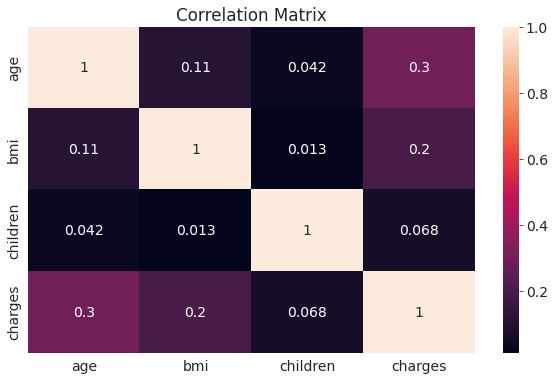

In [ ]:
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation Matrix")

From the above correlation age is mostly correlated to charges and bmi and children
* Note : Correlation don't work for Categorical values

Model Building

In [ ]:
from sklearn import preprocessing

In [ ]:
df.shape

(1338, 7)

In [ ]:
# treating Categorical variabels

df['sex'] = df['sex'].map({"male":0,"female":1})

In [ ]:
enc = preprocessing.OneHotEncoder()
enc.fit(df[["region"]])

OneHotEncoder()

In [ ]:
one = enc.transform(df[['region']]).toarray()

In [ ]:
df[['northeast', 'northwest', 'southeast', 'southwest']] = one

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df.drop(columns="region",inplace=True)

In [ ]:
df["smoker"] = df["smoker"].map({"yes":1,"no":0})

In [ ]:
from sklearn import preprocessing

In [ ]:
x_scaled = preprocessing.scale(x)


In [ ]:
x = x_scaled
y = df["charges"]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
model.coef_

array([3.60249737e+03, 1.21520614e+02, 1.95384248e+03, 5.04058351e+02,
       9.59391213e+03, 8.16958173e+16, 8.17814379e+16, 8.48669334e+16,
       8.17814379e+16])

In [ ]:
model.intercept_

13275.161574933645

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northeast',
       'northwest', 'southeast', 'southwest'],
      dtype='object')

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
pred = model.predict(x_test)

In [ ]:
print("RMSE: ",np.sqrt(mean_squared_error(y_test,pred)))

RMSE:  5956.343437372699


In [ ]:
r2_score(y_test,pred)

0.7623400647492995